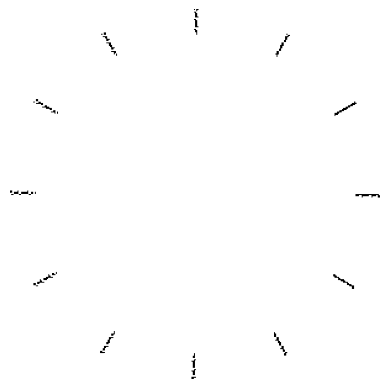

In [1]:
# %matplotlib inline
from PIL import Image, ImageDraw
from matplotlib import pyplot as plt
 
# 時計の文字盤描画
canvas = Image.new('RGBA', (300, 300), (255,255,255,0))
draw = ImageDraw.Draw(canvas)
for i in range(12):
    draw.line((280, 150, 300, 150), fill='black', width=2)
    canvas = canvas.rotate(30)
    draw = ImageDraw.Draw(canvas)
 
plt.imshow(canvas)
plt.axis('off')
plt.show()


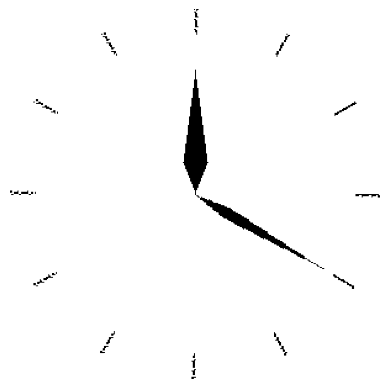

In [1]:
%matplotlib inline
from PIL import Image, ImageDraw
from matplotlib import pyplot as plt
 
# 時計の文字盤描画
canvas = Image.new('RGBA', (300, 300), (255,255,255,0))
draw = ImageDraw.Draw(canvas)
for i in range(12):
    draw.line((280, 150, 300, 150), fill='black', width=2)
    canvas = canvas.rotate(30)
    draw = ImageDraw.Draw(canvas)
 
# 時針の描画
imhour = Image.new('RGBA', (300, 300), (255,255,255,0))
drawhour = ImageDraw.Draw(imhour)
drawhour.polygon((150,150)+(175,140)+(250,150)+(175,160),fill='black')
imhour = imhour.rotate(90)
canvas.paste(imhour,(0,0),imhour)
 
# 分針の描画
imminute = Image.new('RGBA', (300, 300), (255,255,255,0))
drawminute = ImageDraw.Draw(imminute)
drawminute.polygon((150,150)+(180,145)+(270,150)+(180,155),fill='black')
imminute = imminute.rotate(-30)
canvas.paste(imminute,(0,0),imminute)
 
plt.imshow(canvas)
plt.axis('off')
plt.show()


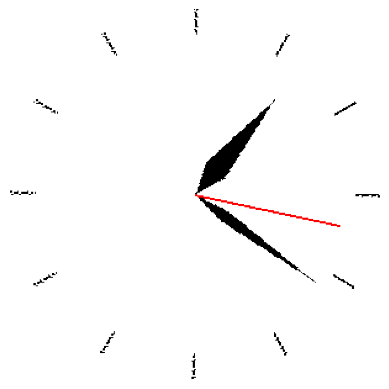

In [1]:
%matplotlib inline
from PIL import Image, ImageDraw
from matplotlib import pyplot as plt
import datetime
 
tm = datetime.datetime.now()
tmhour = tm.hour%12
tmminute = tm.minute
tmsecond = tm.second
 
# 時計の文字盤描画
canvas = Image.new('RGBA', (300, 300), (255,255,255,0))
draw = ImageDraw.Draw(canvas)
for i in range(1,13):
    draw.line((280, 150, 300, 150), fill='black', width=2)
    canvas = canvas.rotate(30)
    draw = ImageDraw.Draw(canvas)
 
# 時針の描画
imhour = Image.new('RGBA', (300, 300), (255,255,255,0))
drawhour = ImageDraw.Draw(imhour)
drawhour.polygon((150,150)+(175,140)+(250,150)+(175,160),fill='black')
imhour = imhour.rotate(-(tmhour*30+tmminute//2-90))
canvas.paste(imhour,(0,0),imhour)
 
# 分針の描画
imminute = Image.new('RGBA', (300, 300), (255,255,255,0))
drawminute = ImageDraw.Draw(imminute)
drawminute.polygon((150,150)+(180,145)+(270,150)+(180,155),fill='black')
imminute = imminute.rotate(-(tmminute*6-90))
canvas.paste(imminute,(0,0),imminute)
 
# 秒針の描画
imsecond = Image.new('RGBA', (300, 300), (255,255,255,0))
drawsecond = ImageDraw.Draw(imsecond)
drawsecond.line((150,150)+(270,150), fill='red', width=2)
imsecond = imsecond.rotate(-(tmsecond*6-90))
canvas.paste(imsecond, (0,0), imsecond)
 
plt.axis("off")
plt.imshow(canvas)
plt.show()


In [2]:
import tkinter as tk
from PIL import Image, ImageDraw, ImageTk
import datetime
 
class AClock(tk.Frame):
    def __init__(self, master=None):
        super().__init__(master)
        self.pack()
        self.create_widgets()
        
    def create_widgets(self):
 
        self.image_data = None
        self.cv = tk.Canvas(self, width = 300, height = 300)
        self.cv.pack()
        self.show_time()
 
    def clock_image(self):
        tm = datetime.datetime.now()
        tmhour = tm.hour
        tmminute = tm.minute
        tmsecond = tm.second
        
        # 時計の文字盤描画
        canvas = Image.new('RGBA', (300, 300), (255,255,255,0))
        draw = ImageDraw.Draw(canvas)
        for i in range(1,13):
            draw.line((280, 150, 300, 150), fill='black', width=2)
            canvas = canvas.rotate(30)
            draw = ImageDraw.Draw(canvas)
        
        # 時針の描画
        imhour = Image.new('RGBA', (300, 300), (255,255,255,0))
        drawhour = ImageDraw.Draw(imhour)
        drawhour.polygon((150,150)+(175,140)+(250,150)+(175,160),fill='black')
        imhour = imhour.rotate(-(tmhour*30+tmminute//2-90))
        canvas.paste(imhour,(0,0),imhour)
        
        # 分針の描画
        imminute = Image.new('RGBA', (300, 300), (255,255,255,0))
        drawminute = ImageDraw.Draw(imminute)
        drawminute.polygon((150,150)+(180,145)+(270,150)+(180,155),fill='black')
        imminute = imminute.rotate(-(tmminute*6-90))
        canvas.paste(imminute,(0,0),imminute)
        
        # 秒針の描画
        imsecond = Image.new('RGBA', (300, 300), (255,255,255,0))
        drawsecond = ImageDraw.Draw(imsecond)
        drawsecond.line((150,150)+(270,150), fill='red', width=2)
        imsecond = imsecond.rotate(-(tmsecond*6-90))
        canvas.paste(imsecond, (0,0), imsecond)
        
        return canvas
 
    def show_time(self):
        self.cv.delete("all")
    
        image = self.clock_image()
        self.image_data = ImageTk.PhotoImage(image)
        self.cv.create_image(150, 150, image=self.image_data)
    
        self.after(1000, self.show_time)
 
if __name__ == "__main__":
    root = tk.Tk()
    root.title("tkClock")
    aclock = AClock(master=root)
    aclock.mainloop() 
